<a href="https://colab.research.google.com/github/amurkhon/Aviacompany/blob/main/aviacompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kutibxona va ma'lumotlarni yuklab olamiz.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/content/train_dataset.csv")
test = pd.read_csv("/content/test_dataset.csv")

In [4]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [6]:
train.shape

(10000, 24)

In [7]:
test.shape

(4000, 23)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

# NaN qiymatlar bilan ishlaymiz va kerakli ustunlarni olib qolamiz.

In [10]:
train.corrwith(train['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Gate location                        0.007169
id                                   0.002931
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes            -0.048650
Departure/Arrival time convenient   -0.067638
dtype: float64

In [11]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [12]:
train.drop(['Gate location','id','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'], axis=1, inplace=True)

In [13]:
test.drop(['Gate location','id','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'], axis=1, inplace=True)

## Ma'lumotlarni vizual ko'rinishga olib kelamiz

In [14]:
def bar_chart(feature):
  yes = train[train['satisfaction']==1][feature].value_counts()
  no = train[train['satisfaction']==0][feature].value_counts()
  df = pd.DataFrame([yes, no])
  df.index = ['yes','no']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

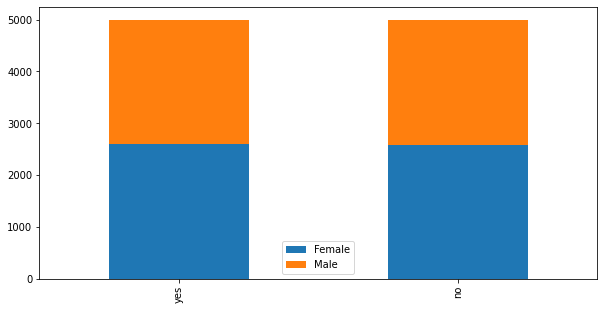

In [15]:
#Demak qoniqshlar soni qoniqmaganlar soni bilan deyarli teng. Bu Gender uchun ham umumiy.
bar_chart('Gender')

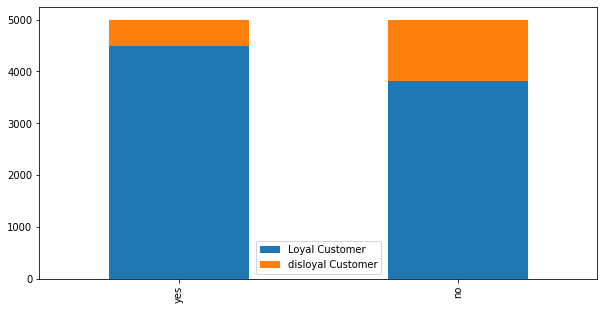

In [16]:
#Disloyal Customerlar ozchilikni datasetimizda tashkil qilyapti.
bar_chart('Customer Type')

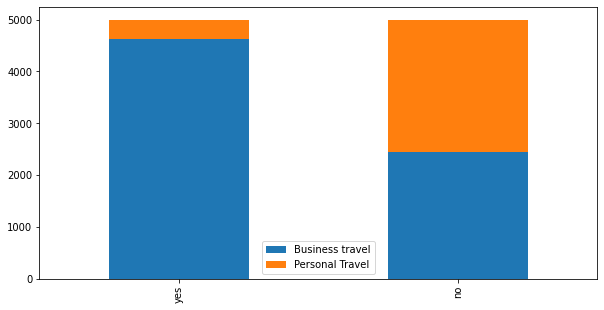

In [17]:
#bundan ko'rinib turibdiki 'yes' ustunidagilarni katta qismini Business Travelga chiqqanlar, 'no' ustubida esa deyarli teng miqdorda.
bar_chart('Type of Travel')

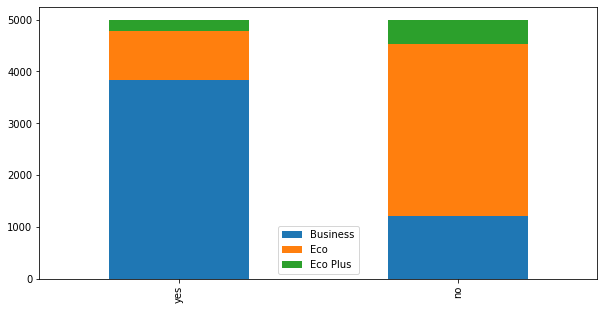

In [18]:
bar_chart('Class')

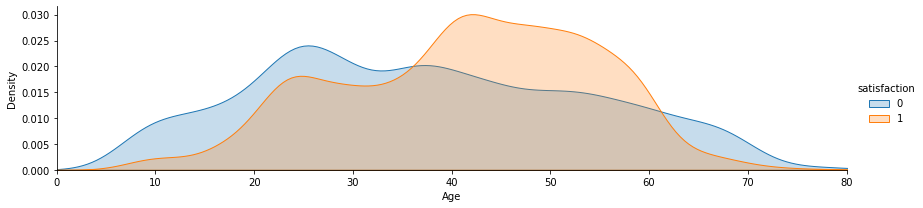

In [19]:
# yosh oralig'ida qoniqqanlar va qoniqmaganlarni ko'rish
facet = sns.FacetGrid(train, hue="satisfaction",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

## Model

In [20]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction'].copy()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [22]:
from sklearn.compose import ColumnTransformer
 
num_attr = list(X[['Age','Flight Distance','Inflight wifi service','Ease of Online booking',
                   'Food and drink','Online boarding','Seat comfort','Inflight entertainment',
                   'On-board service','Leg room service','Baggage handling','Checkin service',
                   'Inflight service','Cleanliness']])
cat_attr = ['Gender','Customer Type','Type of Travel','Class']

full_pipeline = ColumnTransformer([
                           ('num',num_pipeline,num_attr),
                           ('cat',OneHotEncoder(),cat_attr)
])

In [23]:
x_prepared = full_pipeline.fit_transform(X)

In [24]:
#Yuklash Classifier Modullarini
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_prepared,y, test_size=0.2, random_state=42)

### Machine Learning (k-NN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [35]:
y_predict = knn.predict(x_test)

## Baholash

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.8349236641221374

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1002
           1       0.95      0.88      0.91       998

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000



In [ ]:
print("KNeighborsClassifier's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

KNeighborsClassifier's Accuracy:  0.9135


In [ ]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=x_prepared,y=y, cv=5)

from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y,predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5000
           1       0.94      0.87      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Eng yaxshi k ni topish

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x_prepared,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 11}

### Machine Learning(DecisionTreeClassifier)



In [39]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(x_train, y_train)


DecisionTreeClassifier()

### Baholash

In [40]:
y_predict = DTC_model.predict(x_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1002
           1       0.92      0.93      0.92       998

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.92


### RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [44]:
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy:  0.95


In [45]:
samp_sub = pd.read_csv("/content/sample_submission.csv")
samp_sub.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [46]:
test_prepared = full_pipeline.fit_transform(test)

In [47]:
test_predicted = rf_model.predict(test_prepared)

In [48]:
samp_sub['satisfaction'] = test_predicted


In [49]:
samp_sub

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


In [50]:
samp_sub.to_csv("submission.csv", index=False)

In [51]:
pd.read_csv("/content/submission.csv")

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
